In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
%cd gdrive/My\ Drive/Colab\ Notebooks/hw8

/content/gdrive/My Drive/Colab Notebooks/hw8


In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

#Task 1: Linear Regression with One Variable 

##Define Linear Model: 

> The linear model using the definitions from the data file: <br>
>> predicted profit (y) = Theta0 + (city_pop * Theta1)



In [ ]:
# Load the dataset from Google Drive
data = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/hw8/food_truck_data.txt', sep=',', header=None, names=['city_pop', 'profit'])

data

,city_pop,profit
0,6.1101,17.59200
1,5.5277,9.13020
2,8.5186,13.66200
3,7.0032,11.85400
4,5.8598,6.82330
...,...,...
92,5.8707,7.20290
93,5.3054,1.98690
94,8.2934,0.14454
95,13.3940,9.05510


In [ ]:
# Separating the X (input) from the target (Y) and did some reshaping
X = data['city_pop']
Y = data['profit']

In [ ]:
# Apply feature scaling to X (the city population)
X = (X - np.mean(X)) / np.std(X)

In [ ]:
# Add a column of ones to X (for the bias term)
X = np.vstack((np.ones(len(X)), X)).T

In [ ]:
# Define the initial values of the parameters theta0 and theta1 below (the gradient descent will move toward the correct/optimal ones from here)
theta = np.zeros(2)

In [ ]:
# Define the learning rate and number of iterations
alpha = 0.01
num_iters = 1000

In [ ]:
# Define a function to compute the cost function
def compute_cost(X, Y, theta):
    m = len(Y)
    J = (1/(2*m)) * np.sum((X.dot(theta) - Y)**2)
    return J

In [ ]:
# Define a function to perform gradient descent
def gradient_descent(X, Y, theta, alpha, num_iters):
    m = len(Y)
    J_history = np.zeros(num_iters)
    for i in range(num_iters):
        h = X.dot(theta)
        theta = theta - (alpha/m) * (X.T.dot(h - Y))
        J_history[i] = compute_cost(X, Y, theta)
    return theta, J_history

In [ ]:
# Perform gradient descent
theta, J_history = gradient_descent(X, Y, theta, alpha, num_iters)

In [ ]:
# Print the final values of theta
print("Final values of theta:")
print("theta0 =", theta[0])
print("theta1 =", theta[1])

Final values of theta:
theta0 = 5.838882968802416
theta1 = 4.592842846047735


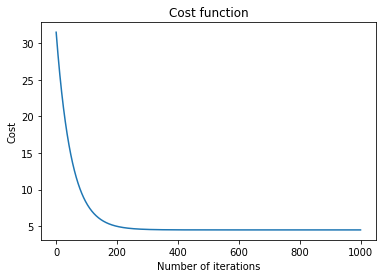

In [ ]:
# Plot the cost function as a function of the number of iterations
plt.plot(J_history)
plt.title("Cost function")
plt.xlabel("Number of iterations")
plt.ylabel("Cost")
plt.show()

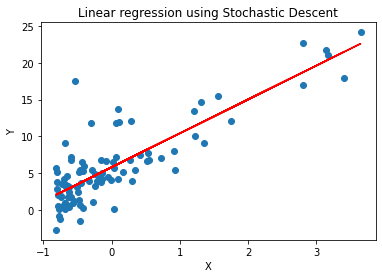

In [ ]:
# Plot the data with the linear model
plt.scatter(X[:, 1], Y)
plt.plot(X[:, 1], X.dot(theta), color='red')
plt.title("Linear regression using Stochastic Descent")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

#Task 2: Linear Regression with Multiple Variables 

##Define Linear Model: 

> The linear model using the definitions from the data file: <br>
>> predicted price (y) = theta0 + (size * theta1) + (bedrooms * theta2)


In [ ]:
# Load the dataset from Google Drive
df = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/hw8/housing_price_data.txt', sep=',', header=None, names = ['size', 'bedrooms', 'price'])

print(df.head())

   size  bedrooms   price
0  2104         3  399900
1  1600         3  329900
2  2400         3  369000
3  1416         2  232000
4  3000         4  539900


In [ ]:
# Descriptive statistics of the housing dataset.
df.describe()

,size,bedrooms,price
count,47.000000,47.000000,47.000000
mean,2000.680851,3.170213,340412.659574
std,794.702354,0.760982,125039.899586
min,852.000000,1.000000,169900.000000
25%,1432.000000,3.000000,249900.000000
50%,1888.000000,3.000000,299900.000000
75%,2269.000000,4.000000,384450.000000
max,4478.000000,5.000000,699900.000000


In [ ]:
# Extract the features and target variable
x = df[['size', 'bedrooms']]  # select columns 1 and 2 as features
y = df['price']  # select column 3 as target variable

# Print the shapes of the X and y arrays to verify the correct columns were selected
print('X shape:', x.shape)
print('y shape:', y.shape)

X shape: (47, 2)
y shape: (47,)


In [ ]:
# Apply feature scaling to X
x = (x - np.mean(x, axis=0)) / np.std(x, axis=0)

In [ ]:
# Add a column of ones to X for the bias term
x = np.hstack((np.ones((len(x), 1)), x))

In [ ]:
# Define the initial values of the parameters theta0, theta1, and theta2
Theta = np.zeros(3)

In [ ]:
# Define the learning rate and number of iterations
alpha = 0.01
iters = 1000

In [ ]:
# Define a function to compute the cost function
def compute_cost(x, y, Theta):
    m = len(y)
    j = (1/(2*m)) * np.sum((x.dot(Theta) - y)**2)
    return j

In [ ]:
# Define a function to perform gradient descent
def gradient_descent(x, y, Theta, alpha, iters):
    m = len(y)
    j_history = np.zeros(iters)
    for i in range(iters):
        h = x.dot(Theta)
        Theta = Theta - (alpha/m) * (x.T.dot(h - y))
        j_history[i] = compute_cost(x, y, Theta)
    return Theta, j_history

In [ ]:
# Perform gradient descent
Theta, j_history = gradient_descent(x, y, Theta, alpha, iters)

In [ ]:
# Print the final values of theta
print("Final values of theta:")
print("Theta0 =", Theta[0])
print("Theta1 =", Theta[1])
print("Theta2 =", Theta[2])

Final values of theta:
Theta0 = 340397.96353531966
Theta1 = 108742.6562723772
Theta2 = -5873.229933827042


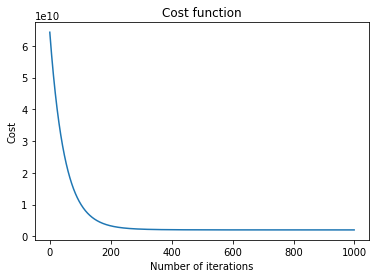

In [ ]:
# Plot the cost function as a function of the number of iterations
plt.plot(j_history)
plt.title("Cost function")
plt.xlabel("Number of iterations")
plt.ylabel("Cost")
plt.show()

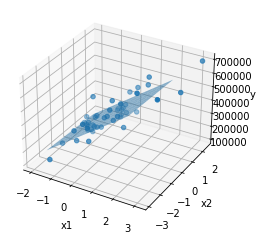

In [ ]:
# Plot the data with the linear model
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x[:, 1], x[:, 2], y)
xx, yy = np.meshgrid(np.linspace(-2, 2, 10), np.linspace(-2, 2, 10))
zz = Theta[0] + Theta[1]*xx + Theta[2]*yy
ax.plot_surface(xx, yy, zz, alpha=0.5)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')
plt.show()